<a href="https://colab.research.google.com/github/Suriya6744/bsc_dpdm22/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

##PTT

In [788]:
import pandas as pd

In [789]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [790]:
ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT.csv')
ptt.shape

(241, 7)

In [791]:
ptt.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,38.00,38.25,38.50,38.00,59.50M,0.00%
1,5/1/2022,39.00,38.25,39.00,38.00,76.59M,2.63%
2,6/1/2022,38.00,38.50,38.75,38.00,71.68M,-2.56%
3,7/1/2022,38.75,38.50,38.75,38.25,59.56M,1.97%
4,10/1/2022,38.50,38.75,38.75,38.00,34.79M,-0.65%


In [792]:
ptt.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [793]:
ptt=ptt[['วันเดือนปี','ล่าสุด','ปริมาณ']]
ptt

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,38.00,59.50M
1,5/1/2022,39.00,76.59M
2,6/1/2022,38.00,71.68M
3,7/1/2022,38.75,59.56M
4,10/1/2022,38.50,34.79M
...,...,...,...
236,26/12/2022,32.25,39.66M
237,27/12/2022,32.50,80.79M
238,28/12/2022,32.75,49.82M
239,29/12/2022,32.75,61.35M


In [794]:
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)


In [795]:
ptt.dtypes

วันเดือนปี     object
ล่าสุด        float64
ปริมาณ         object
dtype: object

In [796]:
ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)

In [797]:
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(float)

In [798]:
# สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
def multiply_by_million(value):
    return value * 1000000

In [799]:
# ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
ptt['ปริมาณ']=ptt['ปริมาณ'].apply(multiply_by_million)


In [800]:
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(int)
ptt

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,38.00,59500000
1,5/1/2022,39.00,76590000
2,6/1/2022,38.00,71680000
3,7/1/2022,38.75,59560000
4,10/1/2022,38.50,34790000
...,...,...,...
236,26/12/2022,32.25,39660000
237,27/12/2022,32.50,80790000
238,28/12/2022,32.75,49820000
239,29/12/2022,32.75,61350000


In [801]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt',
                        'ปริมาณ': 'vol_ptt'})
ptt

,date,cp_ptt,vol_ptt
0,4/1/2022,38.00,59500000
1,5/1/2022,39.00,76590000
2,6/1/2022,38.00,71680000
3,7/1/2022,38.75,59560000
4,10/1/2022,38.50,34790000
...,...,...,...
236,26/12/2022,32.25,39660000
237,27/12/2022,32.50,80790000
238,28/12/2022,32.75,49820000
239,29/12/2022,32.75,61350000


##SCG

In [802]:
scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG.csv')
scg.shape


(241, 7)

In [803]:
scg.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [804]:
scg=scg[['วันเดือนปี','ล่าสุด','ปริมาณ']]
scg

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,6.15,183.00K
1,5/1/2022,6.25,1.15M
2,6/1/2022,6.10,133.50K
3,7/1/2022,6.10,205.10K
4,10/1/2022,6.15,144.40K
...,...,...,...
236,26/12/2022,4.80,37.00K
237,27/12/2022,4.84,62.50K
238,28/12/2022,4.86,41.50K
239,29/12/2022,4.88,47.90K


In [805]:
scg.dtypes

วันเดือนปี     object
ล่าสุด        float64
ปริมาณ         object
dtype: object

In [806]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)


<ipython-input-806-9537f888f457>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)


In [807]:
scg['ปริมาณ']=scg['ปริมาณ'].astype(int)
scg


<ipython-input-807-1706cc465d6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scg['ปริมาณ']=scg['ปริมาณ'].astype(int)


,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,6.15,183000
1,5/1/2022,6.25,1150000
2,6/1/2022,6.10,133500
3,7/1/2022,6.10,205100
4,10/1/2022,6.15,144400
...,...,...,...
236,26/12/2022,4.80,37000
237,27/12/2022,4.84,62500
238,28/12/2022,4.86,41500
239,29/12/2022,4.88,47900


In [808]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg',
                        'ปริมาณ': 'vol_scg'})
scg

,date,cp_scg,vol_scg
0,4/1/2022,6.15,183000
1,5/1/2022,6.25,1150000
2,6/1/2022,6.10,133500
3,7/1/2022,6.10,205100
4,10/1/2022,6.15,144400
...,...,...,...
236,26/12/2022,4.80,37000
237,27/12/2022,4.84,62500
238,28/12/2022,4.86,41500
239,29/12/2022,4.88,47900


##SOLAR

In [809]:
solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR.csv')
solar.shape


(241, 7)

In [810]:
solar.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [811]:
solar=solar[['วันเดือนปี','ล่าสุด','ปริมาณ']]
solar

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,1.51,9.13M
1,5/1/2022,1.51,4.25M
2,6/1/2022,1.44,9.95M
3,7/1/2022,1.24,93.48M
4,10/1/2022,1.24,21.28M
...,...,...,...
236,26/12/2022,0.87,1.06M
237,27/12/2022,0.89,1.46M
238,28/12/2022,0.88,291.80K
239,29/12/2022,0.88,1.05M


In [812]:
solar.dtypes

วันเดือนปี     object
ล่าสุด        float64
ปริมาณ         object
dtype: object

In [813]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)


In [814]:
solar['ปริมาณ']=solar['ปริมาณ'].astype(int)
solar


,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,1.51,9130000
1,5/1/2022,1.51,4250000
2,6/1/2022,1.44,9950000
3,7/1/2022,1.24,93480000
4,10/1/2022,1.24,21280000
...,...,...,...
236,26/12/2022,0.87,1060000
237,27/12/2022,0.89,1460000
238,28/12/2022,0.88,291800
239,29/12/2022,0.88,1050000


In [815]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar',
                        'ปริมาณ': 'vol_solar'})
solar

,date,cp_solar,vol_solar
0,4/1/2022,1.51,9130000
1,5/1/2022,1.51,4250000
2,6/1/2022,1.44,9950000
3,7/1/2022,1.24,93480000
4,10/1/2022,1.24,21280000
...,...,...,...
236,26/12/2022,0.87,1060000
237,27/12/2022,0.89,1460000
238,28/12/2022,0.88,291800
239,29/12/2022,0.88,1050000


##USD

In [816]:
usd = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB.csv')
usd.shape

(260, 7)

In [817]:
usd.head()


,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,3/1/2022,33.24,33.24,33.370,33.130,NaN,0.03%
1,4/1/2022,33.25,33.24,33.365,33.225,NaN,0.03%
2,5/1/2022,33.19,33.26,33.290,33.120,NaN,-0.18%
3,6/1/2022,33.55,33.21,33.595,33.210,NaN,1.08%
4,7/1/2022,33.62,33.56,33.740,33.470,NaN,0.21%


In [818]:
usd=usd[['วันเดือนปี','ล่าสุด']]
usd

,วันเดือนปี,ล่าสุด
0,3/1/2022,33.24
1,4/1/2022,33.25
2,5/1/2022,33.19
3,6/1/2022,33.55
4,7/1/2022,33.62
...,...,...
255,26/12/2022,34.69
256,27/12/2022,34.60
257,28/12/2022,34.78
258,29/12/2022,34.62


In [819]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
usd =usd .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_usd'})
usd

,date,cp_usd
0,3/1/2022,33.24
1,4/1/2022,33.25
2,5/1/2022,33.19
3,6/1/2022,33.55
4,7/1/2022,33.62
...,...,...
255,26/12/2022,34.69
256,27/12/2022,34.60
257,28/12/2022,34.78
258,29/12/2022,34.62


##WTI

In [820]:
wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD.csv')
wti.shape

(310, 7)

In [821]:
wti=wti[['วันเดือนปี','ล่าสุด']]
wti

,วันเดือนปี,ล่าสุด
0,2/1/2022,76.03
1,3/1/2022,76.17
2,4/1/2022,77.25
3,5/1/2022,77.39
4,6/1/2022,79.69
...,...,...
305,26/12/2022,81.06
306,27/12/2022,79.84
307,28/12/2022,78.67
308,29/12/2022,78.67


In [822]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})
wti

,date,cp_wti
0,2/1/2022,76.03
1,3/1/2022,76.17
2,4/1/2022,77.25
3,5/1/2022,77.39
4,6/1/2022,79.69
...,...,...
305,26/12/2022,81.06
306,27/12/2022,79.84
307,28/12/2022,78.67
308,29/12/2022,78.67


##XAU

In [823]:
xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD.csv')
xau.shape

(260, 7)

In [824]:
xau=xau[['วันเดือนปี','ล่าสุด']]
xau

,วันเดือนปี,ล่าสุด
0,3/1/2022,"1,800.85"
1,4/1/2022,"1,814.56"
2,5/1/2022,"1,809.53"
3,6/1/2022,"1,788.68"
4,7/1/2022,"1,795.63"
...,...,...
255,26/12/2022,"1,797.61"
256,27/12/2022,"1,813.93"
257,28/12/2022,"1,804.09"
258,29/12/2022,"1,814.89"


In [825]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})
xau

,date,cp_xau
0,3/1/2022,"1,800.85"
1,4/1/2022,"1,814.56"
2,5/1/2022,"1,809.53"
3,6/1/2022,"1,788.68"
4,7/1/2022,"1,795.63"
...,...,...
255,26/12/2022,"1,797.61"
256,27/12/2022,"1,813.93"
257,28/12/2022,"1,804.09"
258,29/12/2022,"1,814.89"


#Merge

In [826]:
tm1 = wti.merge(usd, how ='left', left_on=['date',], right_on=['date',])
tm1

,date,cp_wti,cp_usd
0,2/1/2022,76.03,NaN
1,3/1/2022,76.17,33.24
2,4/1/2022,77.25,33.25
3,5/1/2022,77.39,33.19
4,6/1/2022,79.69,33.55
...,...,...,...
305,26/12/2022,81.06,34.69
306,27/12/2022,79.84,34.60
307,28/12/2022,78.67,34.78
308,29/12/2022,78.67,34.62


In [827]:
tm2 = tm1.merge(xau, how ='left', left_on=['date',], right_on=['date',])
tm2

,date,cp_wti,cp_usd,cp_xau
0,2/1/2022,76.03,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85"
2,4/1/2022,77.25,33.25,"1,814.56"
3,5/1/2022,77.39,33.19,"1,809.53"
4,6/1/2022,79.69,33.55,"1,788.68"
...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61"
306,27/12/2022,79.84,34.60,"1,813.93"
307,28/12/2022,78.67,34.78,"1,804.09"
308,29/12/2022,78.67,34.62,"1,814.89"


In [828]:
tm3 = tm2.merge(ptt, how ='left', left_on=['date',], right_on=['date',])
tm3

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt
0,2/1/2022,76.03,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85",NaN,NaN
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0
...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0


In [829]:
tm4 = tm3.merge(scg, how ='left', left_on=['date',], right_on=['date',])
tm4

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg
0,2/1/2022,76.03,NaN,NaN,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85",NaN,NaN,NaN,NaN
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0,6.15,183000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0,6.25,1150000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0,6.10,133500.0
...,...,...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0,4.80,37000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0,4.84,62500.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0,4.86,41500.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0,4.88,47900.0


In [830]:
tm5 = tm4.merge(solar, how ='left', left_on=['date',], right_on=['date',])
tm5

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2/1/2022,76.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85",NaN,NaN,NaN,NaN,NaN,NaN
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0,6.10,133500.0,1.44,9950000.0
...,...,...,...,...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [831]:
tm5.isnull().any()

date         False
cp_wti       False
cp_usd        True
cp_xau        True
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
dtype: bool

In [832]:
all_data= tm5.dropna()
all_data


,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,7/1/2022,79.07,33.62,"1,795.63",38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,10/1/2022,78.70,33.62,"1,801.41",38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [833]:
all_data.columns

Index(['date', 'cp_wti', 'cp_usd', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg',
       'vol_scg', 'cp_solar', 'vol_solar'],
      dtype='object')

In [834]:
all_data.dtypes

date          object
cp_wti       float64
cp_usd       float64
cp_xau        object
cp_ptt       float64
vol_ptt      float64
cp_scg       float64
vol_scg      float64
cp_solar     float64
vol_solar    float64
dtype: object

In [835]:
all_data['cp_xau'] = all_data['cp_xau'].str.replace(',', '').astype(float)

<ipython-input-835-9b1f2f07f0b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cp_xau'] = all_data['cp_xau'].str.replace(',', '').astype(float)


In [836]:
all_data['date'] = all_data['date'].str.replace('/', '-')

<ipython-input-836-f8a975dcb8ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['date'] = all_data['date'].str.replace('/', '-')


In [837]:
all_data

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,4-1-2022,77.25,33.25,1814.56,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5-1-2022,77.39,33.19,1809.53,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6-1-2022,79.69,33.55,1788.68,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,7-1-2022,79.07,33.62,1795.63,38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,10-1-2022,78.70,33.62,1801.41,38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...,...
305,26-12-2022,81.06,34.69,1797.61,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27-12-2022,79.84,34.60,1813.93,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28-12-2022,78.67,34.78,1804.09,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29-12-2022,78.67,34.62,1814.89,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [840]:
all_data.columns

Index(['date', 'cp_wti', 'cp_usd', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg',
       'vol_scg', 'cp_solar', 'vol_solar'],
      dtype='object')

In [842]:
all_data = all_data[['cp_wti', 'cp_usd', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg','vol_scg', 'cp_solar', 'vol_solar']]

In [848]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit และ Transform ข้อมูล
scaled_data = scaler.fit_transform(all_data)

# สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
scaled_df = pd.DataFrame(scaled_data, columns=all_data.columns)

# แสดงผลลัพธ์
scaled_df

,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,-1.402527,-1.100940,0.150488,0.700069,0.060415,3.242433,0.362923,3.496903,-0.157981
1,-1.391462,-1.137859,0.095370,1.131294,0.690430,3.551029,3.807543,3.496903,-0.265913
2,-1.209679,-0.916344,-0.133104,0.700069,0.509425,3.088135,0.186596,2.876057,-0.139845
3,-1.258682,-0.873271,-0.056946,1.023487,0.062627,3.088135,0.441647,1.102213,1.707604
4,-1.287925,-0.873271,0.006391,0.915681,-0.850508,3.242433,0.225423,1.102213,0.110743
...,...,...,...,...,...,...,...,...,...
236,-1.101400,-0.214877,-0.035249,-1.779472,-0.670978,-0.923611,-0.157154,-2.179400,-0.336467
237,-1.197824,-0.270256,0.143585,-1.671666,0.845262,-0.800172,-0.066318,-2.002015,-0.327620
238,-1.290296,-0.159498,0.035758,-1.563860,-0.296434,-0.738453,-0.141124,-2.090708,-0.353457
239,-1.290296,-0.257950,0.154104,-1.563860,0.128614,-0.676734,-0.118326,-2.090708,-0.336688


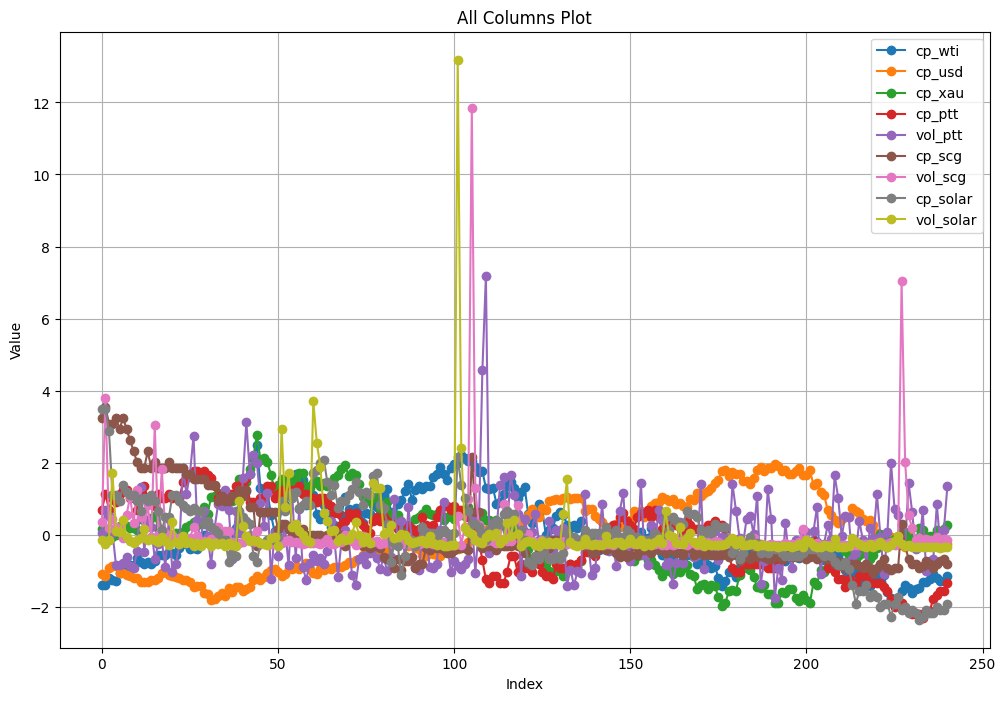

In [849]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
for column in scaled_df.columns:
    plt.plot(scaled_df.index, scaled_df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('All Columns Plot')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Mean Squared Error: 22.13841104789606


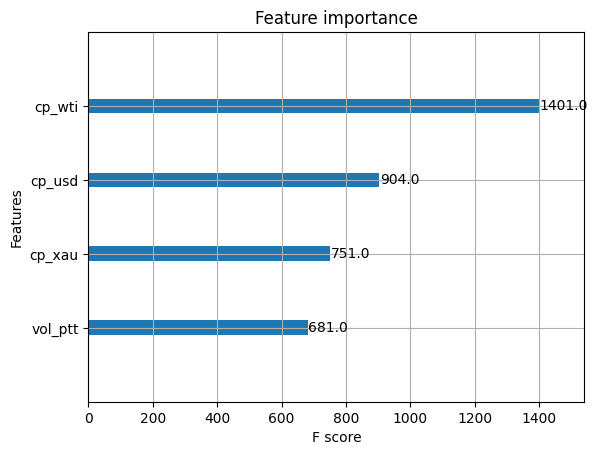

In [852]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = scaled_df[['cp_wti',	'cp_usd','cp_xau','vol_ptt']]  # Replace with your independent variables
y = scaled_df['cp_ptt']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=150,
    max_depth=9,
    learning_rate=0.2,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse*100}")

# Feature importance analysis (optional)
plot_importance(model)
plt.show()



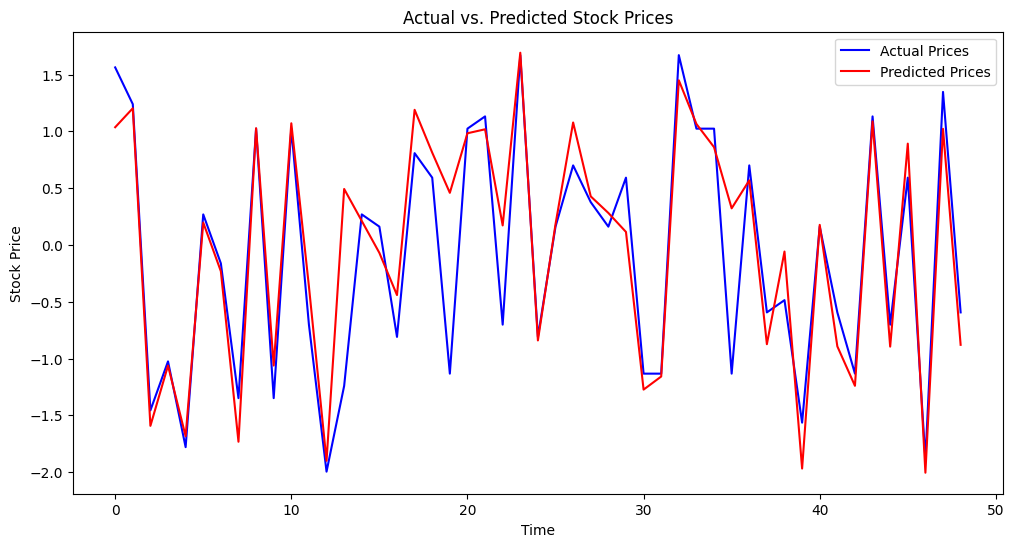

In [853]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()


In [652]:
all_data_u = all_data[['cp_wti', 'cp_usd', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg','vol_scg', 'cp_solar', 'vol_solar']]

In [656]:
date=all_data['date']

In [664]:
date_obj = pd.to_datetime(date, format="%d-%m-%Y")

In [665]:
import numpy as np
dates = [np.datetime64(date) for date in date_obj]

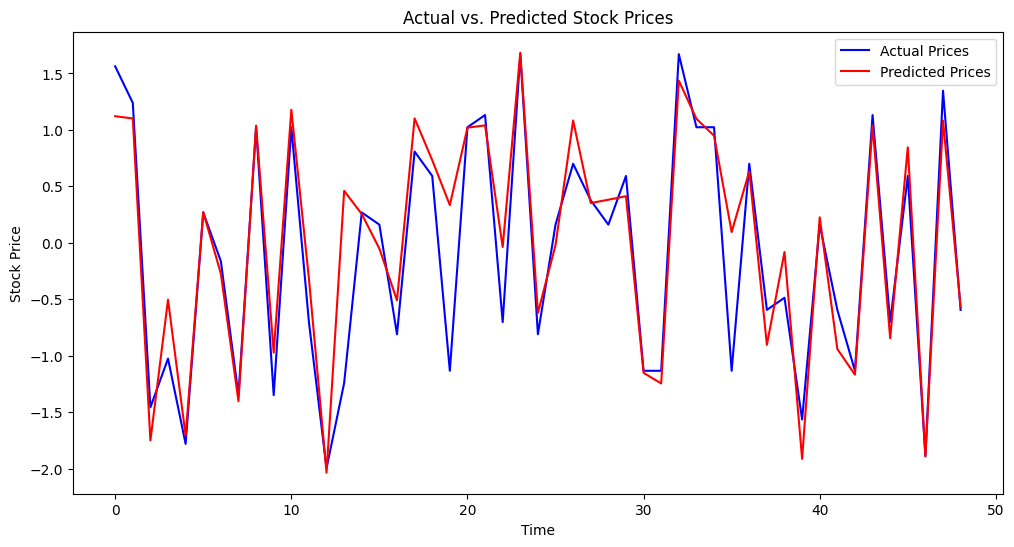

In [674]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()